In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Automobile_data.csv')

In [3]:
df.replace('?', np.nan,inplace = True)

In [4]:
missing_val = df.isnull()

In [5]:
for col in missing_val.columns.values.tolist():
    print(col)
    print(missing_val[col].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [6]:
mean = df['normalized-losses'].astype('float').mean(axis = 0)
df['normalized-losses'].replace(np.nan, mean,inplace =True)

In [7]:
freq = df['num-of-doors'].value_counts().idxmax()

In [8]:
df['num-of-doors'].replace(np.nan, 'four', inplace = True)

In [9]:
mean = df['bore'].astype('float').mean(axis = 0)
df['bore'].replace(np.nan, mean, inplace = True)

In [10]:
mean_stroke = df['stroke'].astype('float').mean(axis = 0)
mean_horsepower = df['horsepower'].astype('float').mean(axis = 0)
mean_peak_rpm = df['peak-rpm'].astype('float').mean(axis = 0)

In [11]:
df['stroke'].replace(np.nan, mean_stroke, inplace = True)
df['horsepower'].replace(np.nan, mean_horsepower, inplace = True)
df['peak-rpm'].replace(np.nan, mean_peak_rpm, inplace = True)

In [12]:
df.dropna(subset=['price'], axis = 0, inplace = True)

In [13]:
df['city-L/100km'] = 235/df['city-mpg']
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111,5000,21,27,13495,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111,5000,21,27,16500,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.00,154,5000,19,26,16500,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.4,10.00,102,5500,24,30,13950,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.4,8.00,115,5500,18,22,17450,13.055556
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.4,8.50,110,5500,19,25,15250,12.368421
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.4,8.50,110,5500,19,25,17710,12.368421
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.4,8.50,110,5500,19,25,18920,12.368421
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.4,8.30,140,5500,17,20,23875,13.823529
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,mpfi,3.5,2.8,8.80,101,5800,23,29,16430,10.217391


1. I have Cleaned the data above by replacing Null values using mean and other methods also standarized the data such as city-mpg to city-L/100km
2. Now doing Normalization..

In [14]:
df['peak-rpm'] = df['peak-rpm'].astype('float')/df['peak-rpm'].astype('float').max()

From This point onwards, i'll be doing Exploratory Data Analysis which inloves analysis using plots etc to determine which charateristics has more impact on the target variable

In [15]:
%%capture
! pip install seaborn

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# How to choose the right visualization method?
When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.

In [17]:
print(df.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                 object
city-L/100km         float64
dtype: object


Because some the data types are wrong e.g price is int but in here it's object, we can't find corrleation between objects.. we need to convert them into right format

In [18]:
df[['normalized-losses']] = df[['normalized-losses']].astype('int')
df[['bore', 'stroke']] = df[['bore', 'stroke']].astype('float')
df[['price']] = df[['price']].astype('int')
df[['horsepower']] = df[['horsepower']].astype('int')

In [19]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int32
city-L/100km         float64
dtype: object

In [20]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,0.066171
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,0.238567
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.476153
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.657373
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.673363
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,0.003811
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.785353
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.745059
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.554610
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,-0.033956,-0.034636,0.082269,0.036133


In [21]:
#selected correlation

df[['bore', 'stroke','horsepower','compression-ratio']].corr()

,bore,stroke,horsepower,compression-ratio
bore,1.000000,-0.055390,0.566903,0.001263
stroke,-0.055390,1.000000,0.098128,0.187871
horsepower,0.566903,0.098128,1.000000,-0.214489
compression-ratio,0.001263,0.187871,-0.214489,1.000000


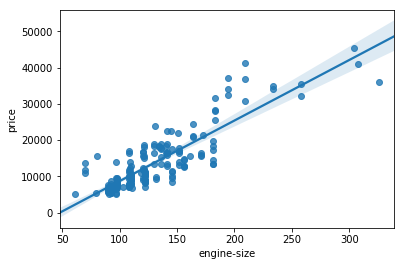

In [22]:
sns.regplot('engine-size', 'price', data =df)

# Categorical variables
These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of
categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical
variables is by using boxplots.
Let's

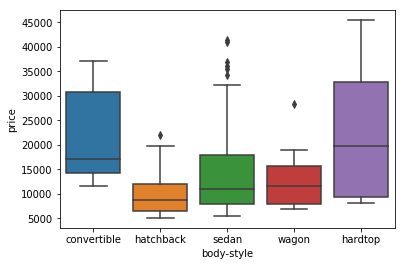

In [23]:
sns.boxplot('body-style', 'price', data =df)

We see that the distributions of price between the different body-style categories have a significant overlap, and
so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":

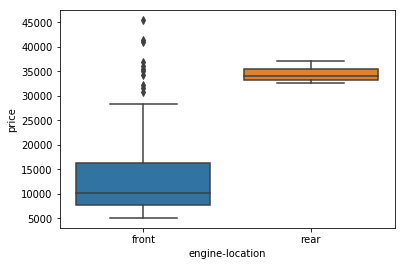

In [24]:
sns.boxplot('engine-location', 'price', data = df)

Here we see that the distribution of price between these two engine-location categories, front and rear, are
distinct enough to take engine-location as a potential good predictor of price.

In [25]:
df['body-style'].value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

# We use value_counts() method to figure out if a varaible is good predictor or not.

In [26]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [27]:
drive_wheels_val_count = df['drive-wheels'].value_counts().to_frame()
drive_wheels_val_count.rename(columns={'drive-wheels' : 'value_counts'}, inplace =True)
drive_wheels_val_count

,value_counts
fwd,118
rwd,75
4wd,8


In [28]:
drive_wheels_val_count.index.name = 'wheel-drive'
drive_wheels_val_count

,value_counts
wheel-drive,
fwd,118
rwd,75
4wd,8


# engine location needs value_counts too beacause it has some categorical data too.

In [29]:
engine_loc_val_count = df['engine-location'].value_counts().to_frame()
engine_loc_val_count.rename(columns = {'engine-location' : 'value-count'}, inplace= True)
engine_loc_val_count.index.name = 'engine-location'
engine_loc_val_count

,value-count
engine-location,
front,198
rear,3


Now we can analyse if these two are good predictors or not, e.g we can see in "engine-location" that there are only 3 rear.. which indecates that engne-location is not a good predictor as it;s data is skewed! 

# Basics of Grouping
The "groupby" method groups data by different categories. The data is grouped based on one or several
variables and analysis is performed on the individual groups.

In [30]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [32]:
group_1 = df[['drive-wheels','body-style','price']]
group_1 = group_1.groupby(['drive-wheels'], as_index = False).mean()
group_1

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and frontwheel
are approximately the same in price.

Now, we can group multiple variable too.

In [33]:
group_2 = df[['drive-wheels','body-style','price']]
group_2 = group_2.groupby(['drive-wheels', 'body-style'], as_index = False).mean()
group_2

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


# This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, 
with one variable along the column and another along the row. We can convert the dataframe to a
pivot table using the method "pivot " to create a pivot table from the groups.
In this case, we will leave the drive-wheel variable as the rows of the table, and pivot body-style to become the
columns of the table:

In [34]:
group_2 = group_2.pivot(index = 'drive-wheels', columns = 'body-style')
group_2

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [35]:
group_2 = group_2.fillna(0)
group_2

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

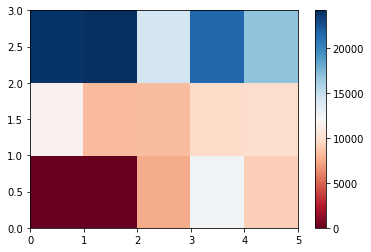

In [36]:
plt.pcolor(group_2, cmap = 'RdBu')
plt.colorbar()
plt.show()

Horizontal represent body-style, vertical left represent drive-wheels and vertical right represent price

# Pearson Correlation
The Pearson Correlation measures the linear dependence between two variables X and Y.
The resulting coefficient is a value between -1 and 1 inclusive, where:

1: Total positive linear correlation.

0: No linear correlation, the two variables most likely do not affect each other.

-1: Total negative linear correlation.

In [38]:
from scipy import stats

when the p-value is <
0.001: we say there is strong evidence that the correlation is significant.

the p-value is <
0.05: there is moderate evidence that the correlation is significant.

the p-value is <
0.1: there is weak evidence that the correlation is significant.

the p-value is>
0.1: there is no evidence that the correlation is significant.


In [47]:
p_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print('The Person Correlation Coefficient is', p_coef , 'and the p-value is =  ', p_value)

('The Person Correlation Coefficient is', 0.5846418222655081, 'and the p-value is =  ', 8.076488270732955e-20)


# Conclusion:

Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although
the linear relationship isn't extremely strong (~0.585)

In [51]:
p_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
p_coef, p_value

(0.8096068016571052, 6.273536270651004e-48)

# Conclusion:

Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the
linear relationship is quite strong (~0.809, close to 1)

# Final Notes after Data Wrangling and Exploratory Data Analysis:

We now have a better idea of what our data looks like and which variables are important to take into account
when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

Length

Width

Curb-weight

Engine-size

Horsepower

City-mpg

Highway-mpg

Wheel-base

Bore

Categorical variables:

Drive-wheels

As we now move into building machine learning models to automate our analysis, feeding the model with
variables that meaningfully affect our target variable will improve our model's prediction performance.